# Plots for TikZ

In [1]:
import matplotlib.pyplot as plt
import tikzplotlib
import re
from pathlib import Path

from plotting import plot_averaged_training_charts, plot_comparison, make_axes, show_timestamp_info
import plotting
plotting.abbreviations['noise'] = r'NOISE'

figures_dir = Path("figures")
figures_dir.mkdir(exist_ok=True)

In [2]:
number_formats = {1e6: '10^6', 1e3: '10^3', 10.0: '10^1', 1.0: '1', 
                  0.25: r'\frac{1}{4}', 0.1: r'\frac{1}{10}', 0.05: r'\frac{1}{20}', 
                  1e-2: r'\frac{1}{100}', 5e287: r'5 \times 10^{287}\  (m \approx 24d)',
                  1 / 9.3e-96: r'1.1 \times 10^{95}\ (m \approx 8d)',
                 }
def modify_for_tikz(ax=None):
    """Hacks to make it more suitable for TikZ.
     - remove the title
     - remove sample sizes from legends
     - for legend labels, put the whole equation in LaTeX
    """
    if ax is None:
        ax = plt.gca()
    
    ax.grid(True, color="#e0e0e0")
    ax.set_title('')
    ax.set_ylabel('test accuracy')
    
    for child in ax.get_children():
        label = child.get_label()
        if not isinstance(label, str):
            continue
        if label in ["analog", "digital"]:
            child.set_label(r"\scriptsize " + label)

        match = re.match(r"NOISE=([\de\.-]+) \((\d+) / (\d+)\)", label)
        if match:
            noise = float(match.group(1))
            analog_samples, digital_samples = match.group(2), match.group(3)
            print(f"noise = {noise}: {analog_samples} analog samples, {digital_samples} digital_samples")

            power = 1.0
            snr = power / noise
            new_label = r"\scriptsize $\mathrm{SNR} = " + number_formats[snr] + "$"
            child.set_label(new_label)

        match = re.match(r"(\w+) NOISE=([\de\.-]+) \((\d+)\)", label)
        if match:
            prefix = match.group(1)
            noise = float(match.group(2))
            samples = match.group(3)
            print(f"{prefix}, noise = {noise}: {samples} samples")
            
            power = 1.0
            snr = power / noise
            new_label = r"\scriptsize " + prefix + r", $\mathrm{SNR} = " + number_formats[snr] + "$"
            child.set_label(new_label)
    
    ax.legend()

In [3]:
common_specs = {
    'rounds':                   ('expect', 150),
    'batch_size':               ('expect', 64),
    'epochs':                   ('expect', 1),
    'ema_coefficient':          ('expect', 1 / 3),
    'save_squared_error':       ('expect', False),
    'send':                     ('expect', 'deltas'),
    'power':                    ('title',  1.0),
    'optimizer_client':         ('expect', 'sgd'),
    'clients':                  ('title',  20),
    'noise':                    ('series', '__all__'),
    'lr_scheduler_client':      ('expect', 'none'),
}
base_analog_specs = common_specs.copy()
base_analog_specs.update({
    'script': 'dynpower.py',
    'power_update_period':      ('expect', 1),
    'power_factor':             ('expect', 0.9),
    'power_quantile':           ('expect', 1.0),
    'parameter_radius_initial': ('expect', 1.0),
})
base_digital_specs = common_specs.copy()
base_digital_specs.update({
    'script': 'dynquant.py',
    'qrange_update_period':     ('expect', 1),
    'qrange_client_quantile':   ('expect', 1.0),
    'qrange_initial':           ('expect', 1.0),
    'channel_uses':             ('expect', None),
    'rounding_method':          ('expect', 'stochastic'),
    'parameter_schedule':       ('expect', 'staggered'),
    'zero_bits_strategy':       ('expect', 'read-zero'),
})

extra_lines = []# [('confints', 1/5)]

# Logistic regression

- Skipping 36 runs that don't match on 1 keys: clients (36)
- Skipping 36 runs that don't match on 1 keys: clients (36)
noise = 1e-06: 13 analog samples, 12 digital_samples
noise = 0.1: 13 analog samples, 12 digital_samples
noise = 1.0: 13 analog samples, 12 digital_samples


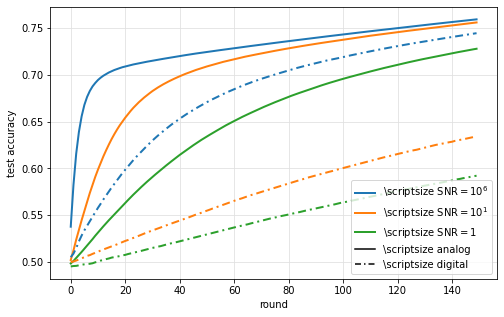

In [4]:
paths = [
    "results/20210825a-epsilon-1",
    "results/20210825a-epsilon-2",
]
epsilon_specs = {
    'dataset':                ('title',  'epsilon'),
    'lr_client':              ('expect', 0.01),
    'momentum_client':        ('expect', 0.0),
    'weight_decay_client':    ('expect', 0.0),
    'data_per_client':        ('expect', 20000),
    'clients':                ('title',  5),
}

analog_specs = base_analog_specs.copy()
digital_specs = base_digital_specs.copy()
analog_specs.update(epsilon_specs)
digital_specs.update(epsilon_specs)
digital_specs['qrange_param_quantile'] = ('expect', 1.0)

plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=extra_lines, linewidth=2)
modify_for_tikz()
tikzplotlib.save(figures_dir / "epsilon-n5.tikz")

- Skipping 39 runs that don't match on 1 keys: clients (39)
- Skipping 36 runs that don't match on 1 keys: clients (36)
noise = 1e-06: 12 analog samples, 12 digital_samples
noise = 0.1: 12 analog samples, 12 digital_samples
noise = 1.0: 12 analog samples, 12 digital_samples


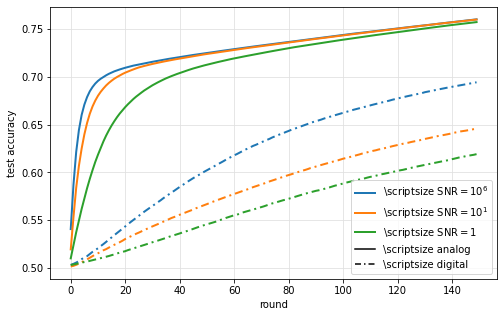

In [5]:
analog_specs = base_analog_specs.copy()
digital_specs = base_digital_specs.copy()
epsilon_specs['clients'] = ('title', 20)
analog_specs.update(epsilon_specs)
digital_specs.update(epsilon_specs)
digital_specs['qrange_param_quantile'] = ('expect', 1.0)

plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=extra_lines, linewidth=2)
modify_for_tikz()
tikzplotlib.save(figures_dir / "epsilon-n20.tikz")

# Fashion-MNIST CNN2

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **24 Aug 2021, 21:40:00** | 24 Aug 2021, 22:23:18 | 43 min 17 s |
| last to finish | 25 Aug 2021, 08:47:18 | **25 Aug 2021, 09:19:14** | 31 min 55 s |
| shortest | 25 Aug 2021, 08:33:27 | 25 Aug 2021, 09:02:57 | **29 min 29 s** |
| longest | 25 Aug 2021, 03:39:01 | 25 Aug 2021, 04:35:29 | **56 min 27 s** |


- Skipping 10 runs that don't match on 1 keys: noise (10)
- Skipping 14 runs that don't match on 1 keys: noise (14)
analog, noise = 1e-06: 17 samples
analog, noise = 0.1: 17 samples
digital, noise = 1e-06: 16 samples
digital, noise = 0.1: 16 samples


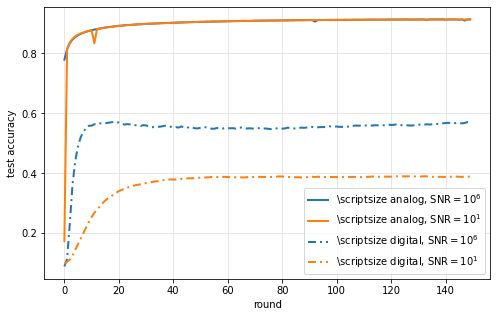

In [6]:
paths = [
    "results/20210825a-fashionmnist-cnn2",
]
fmnist_cnn2_specs = {
    'dataset':                ('title',  'fashionmnist-cnn2'),
    'momentum_client':        ('expect', 0.0),
    'weight_decay_client':    ('expect', 0.0),
    'data_per_client':        ('expect', None),
    'clients':                ('title',  20),
    'noise':                  ('series', [1e-6, 0.1]),
}

analog_specs = base_analog_specs.copy()
analog_specs.update(fmnist_cnn2_specs)
analog_specs['lr_client'] = ('expect', 0.05)

digital_specs = base_digital_specs.copy()
digital_specs.update(fmnist_cnn2_specs)
digital_specs['lr_client'] = ('expect', 0.01)
digital_specs['qrange_param_quantile'] = ('expect', 0.99)

show_timestamp_info(paths)
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=extra_lines, linewidth=2)
modify_for_tikz()
tikzplotlib.save(figures_dir / "fashionmnist-cnn.tikz")

Special crazy plot:

- Skipping 5 runs that don't match on 2 keys: noise (5), parameter_radius_initial (3)
analog, noise = 4.0: 1 samples


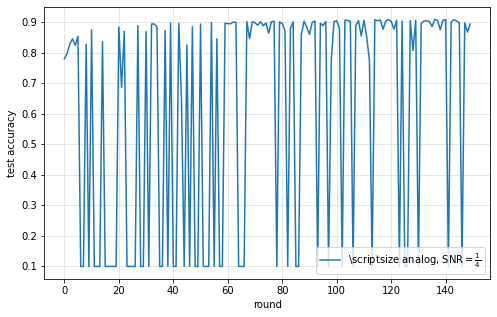

In [7]:
paths = [
    "results/20210824-fashionmnist-cnn2-hinoise",
]
analog_specs = base_analog_specs.copy()
analog_specs.update(fmnist_cnn2_specs)
analog_specs.update({
    'lr_client':                ('filter', 0.05),
    'parameter_radius_initial': ('filter', 0.001, {'missing-action': 'skip'}),
    'noise':                    ('series', 4),
})
plot_averaged_training_charts(paths, ['accuracy'], analog_specs, label='analog')
modify_for_tikz()
plt.legend(loc='lower right')
tikzplotlib.save(figures_dir / "fashionmnist-crazy.tikz")

# CIFAR-10 simple (CNN)

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **25 Aug 2021, 05:09:27** | 25 Aug 2021, 05:54:35 | 45 min 07 s |
| last to finish | 25 Aug 2021, 15:15:14 | **25 Aug 2021, 16:01:45** | 46 min 31 s |
| shortest | 25 Aug 2021, 11:10:03 | 25 Aug 2021, 11:54:41 | **44 min 38 s** |
| longest | 25 Aug 2021, 08:17:41 | 25 Aug 2021, 09:04:26 | **46 min 44 s** |


noise = 1e-06: 10 analog samples, 10 digital_samples
noise = 0.1: 9 analog samples, 9 digital_samples
noise = 20.0: 9 analog samples, 9 digital_samples


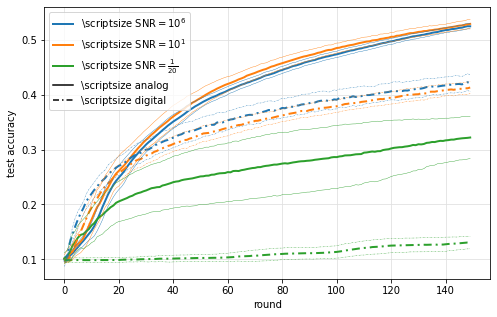

In [8]:
paths = [
    "results/20210825a-cifar10-simple-1",
    "results/20210825a-cifar10-simple-2",
]
cifar10_simple_specs = {
    'dataset':                ('title',  'cifar10-simple-flipcrop'),
    'lr_client':              ('expect', 0.001),
    'momentum_client':        ('expect', 0.9),
    'weight_decay_client':    ('expect', 0.0),
    'data_per_client':        ('expect', None),
    'clients':                ('title',  20),
}

analog_specs = base_analog_specs.copy()
digital_specs = base_digital_specs.copy()
analog_specs.update(cifar10_simple_specs)
digital_specs.update(cifar10_simple_specs)
digital_specs['qrange_param_quantile'] = ('expect', 1.0)

show_timestamp_info(paths)
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=[('confints', 1/5)], linewidth=2)
modify_for_tikz()
tikzplotlib.save(figures_dir / "cifar10-cnn.tikz")

# CIFAR-10 ResNet

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **24 Aug 2021, 21:49:21** | 24 Aug 2021, 22:58:31 | 1 h 09 min 10 s |
| last to finish | 25 Aug 2021, 08:09:00 | **25 Aug 2021, 09:18:34** | 1 h 09 min 33 s |
| shortest | 25 Aug 2021, 02:25:46 | 25 Aug 2021, 03:33:20 | **1 h 07 min 33 s** |
| longest | 25 Aug 2021, 08:07:07 | 25 Aug 2021, 09:18:05 | **1 h 10 min 57 s** |


noise = 1e-06: 7 analog samples, 7 digital_samples
noise = 0.1: 6 analog samples, 7 digital_samples
noise = 10.0: 6 analog samples, 6 digital_samples


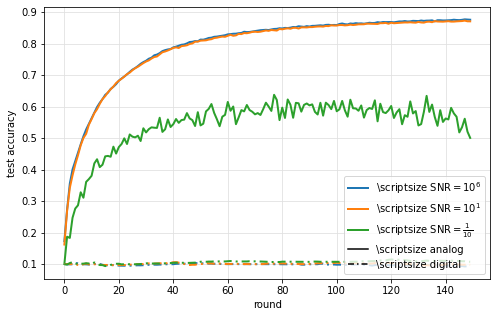

In [9]:
paths = [
    "results/20210825a-cifar10-resnet20",
]
cifar10_simple_specs = {
    'dataset':                ('title',  'cifar10-resnet20-flipcrop'),
    'lr_client':              ('expect', 0.1),
    'momentum_client':        ('expect', 0.9),
    'weight_decay_client':    ('expect', 1e-4),
    'data_per_client':        ('expect', None),
    'clients':                ('title',  20),
    'batch_size':             ('expect', 128),
}
analog_specs = base_analog_specs.copy()
digital_specs = base_digital_specs.copy()
analog_specs.update(cifar10_simple_specs)
digital_specs.update(cifar10_simple_specs)
digital_specs['qrange_client_quantile'] = ('expect', 0.9)
digital_specs['qrange_param_quantile'] = ('expect', 0.9)

show_timestamp_info(paths)
plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=extra_lines, linewidth=2)
modify_for_tikz()
plt.legend(loc='lower right')
tikzplotlib.save(figures_dir / "cifar10-resnet.tikz")

- Skipping 12 runs using 1 other scripts: dynrange.py (12)
- Skipping 12 runs that don't match on 1 keys: noise (12)
- Skipping 12 runs using 1 other scripts: dynrange.py (12)
- Skipping 55 runs that don't match on 4 keys: qrange_param_quantile (45), dataset (32), qrange_client_quantile (30), noise (19)
analog, noise = 1e-06: 7 samples
digital, noise = 2e-288: 3 samples
digital, noise = 9.3e-96: 2 samples


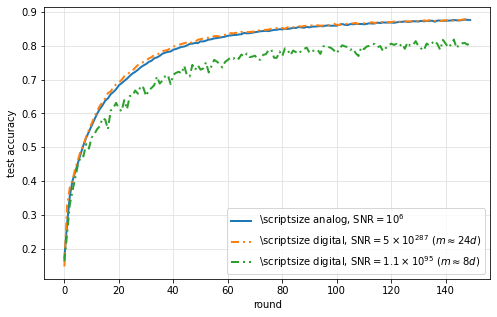

In [10]:
paths.extend([
    "results/20210823-lonoise-p1",
    "results/20210823-lonoise-p2",
])

analog_specs['noise'] = ('series', 1e-6)
digital_specs.update({
    'noise':                    ('series', [1e-6, 9.3e-96, 2e-288]),
    'qrange_initial':           ('expect', 1.0, {'missing-treat-as': 1.0}),
    'qrange_client_quantile':   ('filter', 1.0),
    'qrange_param_quantile':    ('filter', 1.0),
    'lr_client':                ('expect-if', 0.1),
    'momentum_client':          ('expect-if', 0.9),
    'weight_decay_client':      ('expect-if', 1e-4),
    'data_per_client':          ('expect-if', None),
    'batch_size':               ('expect-if', 128),
})

plot_comparison('accuracy', paths, analog_specs, digital_specs, extra_lines=extra_lines, linewidth=2)
modify_for_tikz()

# extra hack: make the noise=100 line a different color, so colors match in all four plots
children = plt.gca().get_children()
children[1].set_color('C1')
children[2].set_color('C2')
            
plt.legend(loc='lower right')
tikzplotlib.save(figures_dir / "cifar10-digital.tikz")